In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from data_import import data_import_single_year, data_import_emissions_companies

In [2]:
# load the value to predict (next years emission)
Ys = data_import_single_year(2021, 'conc')
row_sums = Ys.sum(axis=1)
Ys = Ys / row_sums[:, np.newaxis]


# load emissions
emissions = data_import_single_year(2020, 'conc')

# normalize the values
row_sums = emissions.sum(axis=1)
emissions = emissions / row_sums[:, np.newaxis]

# load company_data
companies = data_import_emissions_companies([2020])

company_count = companies['company_count'][2020]
company_count[np.isnan(company_count)] = 0
company_emission = companies['company_emission'][2020]
company_emission[np.isnan(company_emission)] = 0
# normalize the values
# row_sums = company_count.sum(axis=1)
# company_count = company_count / row_sums[:, np.newaxis]

print(company_count.min())

row_sums = company_emission.sum(axis=1)
company_emission = company_emission / row_sums[:, np.newaxis]

C:\Users\maxva\AppData\Local\Temp\ipykernel_4744\3912800425.py:4: RuntimeWarning: invalid value encountered in divide
  Ys = Ys / row_sums[:, np.newaxis]


0.0


C:\Users\maxva\AppData\Local\Temp\ipykernel_4744\3912800425.py:12: RuntimeWarning: invalid value encountered in divide
  emissions = emissions / row_sums[:, np.newaxis]
C:\Users\maxva\AppData\Local\Temp\ipykernel_4744\3912800425.py:28: RuntimeWarning: invalid value encountered in divide
  company_emission = company_emission / row_sums[:, np.newaxis]


In [3]:
class Tile:
    def __init__(self, a=0, b=0, c=0):
        self.current_emission = a
        self.no_companies = b
        self.emission_comp = c

In [8]:
tiles = []
for y in range(len(emissions)):
    row = []
    for x in range(len(emissions[0])):
        row.append(Tile(emissions[y,x], company_count[y,x], company_emission[y,x]))
    tiles.append(row)

In [9]:
def get_neighbours(coord, n=1):
    neighbours = []
    for i in range(coord[0] - n, coord[0] + n + 1):
        if 0 <= i < len(tiles):
            for j in range(coord[1] - n, coord[1] + n + 1):
                if 0 <= j < len(tiles[0]):
                    if i != coord[0] or j != coord[1]:
                        neighbours.append(tiles[i][j])
    return neighbours

In [5]:
def get_avg_emission(neighbours):
    e = 0
    for nei in neighbours:
        e += nei.current_emission

    return e/len(neighbours)

In [6]:
def get_no_companies(neighbours):
    e = 0
    for nei in neighbours:
        e += nei.no_companies

    return e

In [10]:
x_vals = []
Y = []
for y in range(len(tiles)):
    for x in range(len(tiles[y])):
        em = tiles[y][x].current_emission
        neighbours = get_neighbours((y,x), n=1)
        nem = get_avg_emission(neighbours)
        ncomp = get_no_companies(neighbours)
        x_vals.append([em,nem,ncomp])
        Y.append(Ys[y][x])

In [11]:
x_vals = np.array(x_vals)
x_vals[np.isnan(x_vals)] = 0

Y = np.where(np.isnan(Y), 0, Y)

In [12]:
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta

def predict_Y(b,theta,X):
    return b + np.dot(X,theta)

def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [68]:
b,theta=initialize(3)
print("After initialization -Bias: ",b,"theta: ",theta)
print(f"calculated loss before: {get_cost(Y,predict_Y(b,theta,x_vals))}")
Y_hat=predict_Y(b,theta,x_vals)
losses = []

After initialization -Bias:  0.5087845465326931 theta:  [0.29759306 0.57707606 0.59417725]
calculated loss before: 0.38079010792986434


In [69]:
l = []
b,theta=initialize(3)
print("After initialization -Bias: ",b,"theta: ",theta)
print(f"calculated loss before: {get_cost(Y,predict_Y(b,theta,x_vals))}")
Y_hat=predict_Y(b,theta,x_vals)
for i in range(1000):
    print(i)
    b,theta=update_theta(x_vals,Y,Y_hat,b,theta,0.001)
    loss = get_cost(Y,predict_Y(b,theta,x_vals))
    l.append(loss)
    print("After update -Bias: ",b,"theta: ",theta)
    print(f"calculated loss after: {loss}")
losses.append(l)

After initialization -Bias:  0.8938358714296536 theta:  [0.8178531  0.42429286 0.30183966]
calculated loss before: 0.8591041650557086
0
After update -Bias:  0.892004092711478 theta:  [0.81784641 0.4242862  0.30157693]
calculated loss after: 0.8556830790494733
1
After update -Bias:  0.8901723139933023 theta:  [0.81783972 0.42427954 0.30131421]
calculated loss after: 0.8522688707743704
2
After update -Bias:  0.8883405352751267 theta:  [0.81783303 0.42427287 0.30105149]
calculated loss after: 0.8488615402304001
3
After update -Bias:  0.886508756556951 theta:  [0.81782635 0.42426621 0.30078877]
calculated loss after: 0.8454610874175459
4
After update -Bias:  0.8846769778387754 theta:  [0.81781966 0.42425954 0.30052605]
calculated loss after: 0.8420675123358277
5
After update -Bias:  0.8828451991205998 theta:  [0.81781297 0.42425288 0.30026333]
calculated loss after: 0.8386808149852387
6
After update -Bias:  0.8810134204024241 theta:  [0.81780629 0.42424622 0.30000061]
calculated loss after

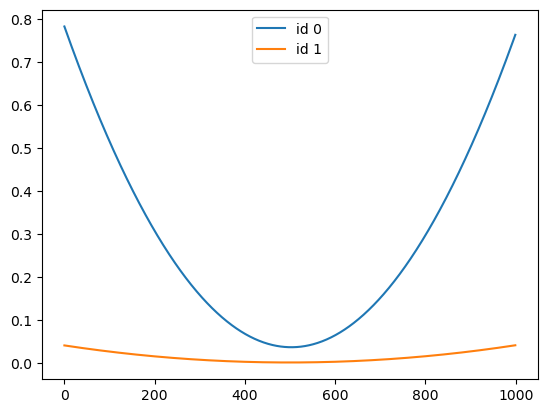

In [67]:
for i in range(len(losses)):
    plt.plot(range(len(losses[0])),losses[i],label = 'id %s'%i)
plt.legend()
plt.show()